In [1]:
import xarray as xr
import xarray.plot as xplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
#import netCDF4
import numpy as np
import cmocean
import pandas as pd
import glob
import os

In [4]:
paths_Toarcian_eq=sorted(glob.glob('./18?Ma_*'))
paths_problematic=[]

paths_Toarcian_eq

['./180Ma_0300ppm_KocsisScotese2020_eq',
 './180Ma_0400ppm_KocsisScotese2020_eq',
 './180Ma_0500ppm_KocsisScotese2020_eq',
 './180Ma_0750ppm_KocsisScotese2020_eq',
 './180Ma_1000ppm_KocsisScotese2020_eq',
 './180Ma_1250ppm_KocsisScotese2020_eq',
 './180Ma_1500ppm_KocsisScotese2020_eq',
 './185Ma_0300ppm_KocsisScotese2020_eq',
 './185Ma_0400ppm_KocsisScotese2020_eq',
 './185Ma_0500ppm_KocsisScotese2020_eq',
 './185Ma_0750ppm_KocsisScotese2020_eq',
 './185Ma_1000ppm_KocsisScotese2020_eq',
 './185Ma_1250ppm_KocsisScotese2020_eq',
 './185Ma_1500ppm_KocsisScotese2020_eq']

In [5]:
Toarcian_df=pd.DataFrame([],columns=['run','age','pCO2'],index=paths_Toarcian_eq)

recon_geos=['KocsisScotese2018']
colors_recon_geo=['k']


for ii in Toarcian_df.index:
    run=ii[ii.index('./')+2:14+1]
    age=int(ii[ii.index('Ma_')-3:ii.index('Ma_')])
    pCO2=int(ii[ii.index('ppm_')-4:ii.index('ppm_')])
    
    Toarcian_df.loc[ii,['run','age','pCO2']]=[run,age,pCO2]
    
pCO2s=list(np.unique(Toarcian_df['pCO2']))
ages=list(np.unique(Toarcian_df['age']))
    
Toarcian_df



,run,age,pCO2
./180Ma_0300ppm_KocsisScotese2020_eq,180Ma_0300ppm,180,300
./180Ma_0400ppm_KocsisScotese2020_eq,180Ma_0400ppm,180,400
./180Ma_0500ppm_KocsisScotese2020_eq,180Ma_0500ppm,180,500
./180Ma_0750ppm_KocsisScotese2020_eq,180Ma_0750ppm,180,750
./180Ma_1000ppm_KocsisScotese2020_eq,180Ma_1000ppm,180,1000
./180Ma_1250ppm_KocsisScotese2020_eq,180Ma_1250ppm,180,1250
./180Ma_1500ppm_KocsisScotese2020_eq,180Ma_1500ppm,180,1500
./185Ma_0300ppm_KocsisScotese2020_eq,185Ma_0300ppm,185,300
./185Ma_0400ppm_KocsisScotese2020_eq,185Ma_0400ppm,185,400
./185Ma_0500ppm_KocsisScotese2020_eq,185Ma_0500ppm,185,500


In [6]:
### List of runs, with age and pCO2 (for Mesozoic)
# 50  teXyg  293Ma NaN; pCO2=503ppm https://www.paleo.bristol.ac.uk/ummodel/data/teXyg/standard_new_html/teXyg.html
# 51  teXyf  287Ma NaN; pCO2=508ppm https://www.paleo.bristol.ac.uk/ummodel/data/teXyf/standard_new_html/teXyf.html

# teXpg 292.6Ma pCO2=495.35ppm https://www.paleo.bristol.ac.uk/ummodel/data/teXpg/standard_new_html/teXpg.html
# teXpf 286.8Ma pCO2=625.67ppm https://www.paleo.bristol.ac.uk/ummodel/data/teXpf/standard_new_html/teXpf.html

paths_Valdes=['./texYl',\
              './texYk',\
              './texPl1',\
              './texPk1']

Valdes_df=pd.DataFrame([],columns=['run','age','pCO2'],index=paths_Valdes)
Valdes_df.loc[paths_Valdes[0],['run','age','pCO2']]=['texYl',186.8,560]
Valdes_df.loc[paths_Valdes[1],['run','age','pCO2']]=['texYk',178.4,560]
Valdes_df.loc[paths_Valdes[2],['run','age','pCO2']]=['texPl1',186.8,948.81]
Valdes_df.loc[paths_Valdes[3],['run','age','pCO2']]=['texPk1',178.4,986.22]

Valdes_df

,run,age,pCO2
./texYl,texYl,186.8,560
./texYk,texYk,178.4,560
./texPl1,texPl1,186.8,948.81
./texPk1,texPk1,178.4,986.22


In [7]:
ds=xr.open_dataset(paths_Toarcian_eq[0]+'/ocn_varsel.nc')
weights_cX = np.cos(np.deg2rad(ds.lat))

path=paths_Valdes[0]
[run,age,pCO2]=Valdes_df.loc[path,['run','age','pCO2']]  
ds = xr.open_dataset('{}/{}o.pfcl_allmonths.nc'.format(path,run),decode_times=False)
weights_Valdes = np.cos(np.deg2rad(ds.latitude))

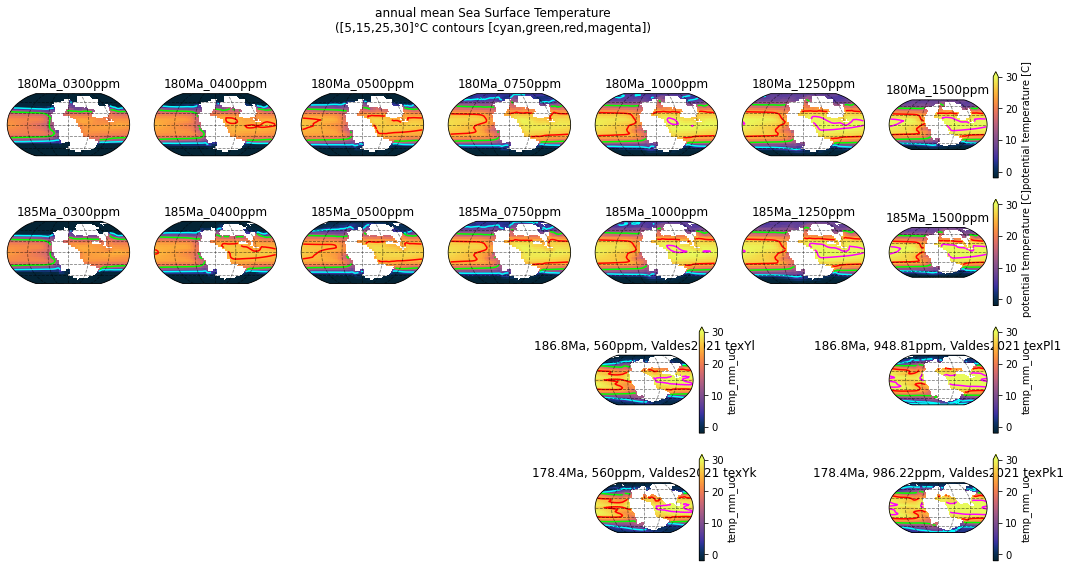

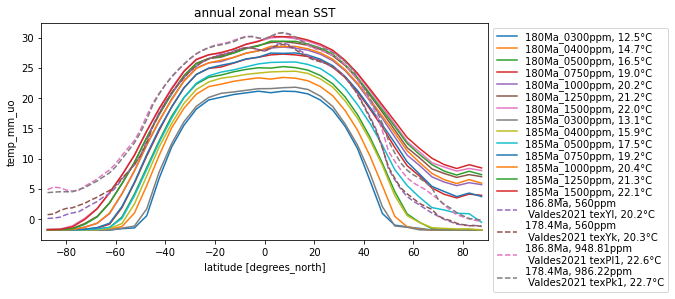

In [8]:
fig,axs=plt.subplots(4,7, subplot_kw={'projection': ccrs.Robinson()},figsize=(18,9),facecolor='w')

axs_rightmost=axs[:,-1]

fig2=plt.figure(figsize=(8,4),facecolor='w') #
ax2=fig2.add_subplot(111)

for path in paths_Toarcian_eq:
    if path not in paths_problematic and os.path.isfile(path+'/ocn_varsel.nc'):
        
        ds_ocn = xr.open_dataset(path+'/ocn_varsel.nc')
        
        if isinstance(ds_ocn.coords['time'].data, np.ndarray) and len(ds_ocn.coords['time'].data)>0:

            [run,age,pCO2]=Toarcian_df.loc[path,['run','age','pCO2']].values[:]

            ii=ages.index(int(age))
            jj=pCO2s.index(pCO2)
            ax=axs[ii,jj]
            
            if ax not in axs_rightmost:
                cbar_opt=False
            else:
                cbar_opt=True

            var=ds_ocn.data_vars['t'].isel(month=12).isel(lev=0)
            if pCO2!=500:
                var=var.isel(time=-1)
            else:
                var=var.isel(time=slice(4,9+1)).mean(dim='time')
                
            p=xplt.plot(var, ax=ax,transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal,vmin=-2,vmax=30,add_colorbar=cbar_opt)
            xplt.contour(var,ax=ax,transform=ccrs.PlateCarree(),levels=[5,15,25,30],colors=['cyan','lime','red','magenta']);
            p.axes.gridlines(color='black', alpha=0.5, linestyle='--')


            ax.set_title(run)
            
            var_weighted_mean_1=var.weighted(weights_cX).mean(['lat','lon'])
            label='{}, {:.1f}°C'.format(run,var_weighted_mean_1.data)
            xplt.plot(var.mean('lon'), ax=ax2,label=label)
            

    

for path in Valdes_df.index:
    [run,age,pCO2]=Valdes_df.loc[path,['run','age','pCO2']]  

    ds_ocn = xr.open_dataset('{}/{}o.pfcl_allmonths.nc'.format(path,run),decode_times=False)
    
    if paths_Valdes.index(path)==0:
        ii=2; jj=4;
    if paths_Valdes.index(path)==1:
        ii=3; jj=4;
    if paths_Valdes.index(path)==2:
        ii=2; jj=6;
    if paths_Valdes.index(path)==3:
        ii=3; jj=6;

    ax=axs[ii,jj]

    var=ds_ocn.data_vars['temp_mm_uo'].mean(dim='t').isel(unspecified=0) #.isel(ht=0)
    p=xplt.plot(var, ax=ax,transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal,vmin=-2,vmax=30)
    xplt.contour(var,ax=ax,transform=ccrs.PlateCarree(),levels=[5,15,25,30],colors=['cyan','lime','red','magenta']);
    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')

    ax.set_title('')
    ax.set_title('{}Ma, {}ppm, Valdes2021 {}'.format(age,pCO2,run))
    
    var_weighted_mean_1=var.weighted(weights_Valdes).mean(['latitude','longitude'])
    label='{}Ma, {}ppm\n Valdes2021 {}, {:.1f}°C'.format(age,pCO2,run,var_weighted_mean_1.data)
    xplt.plot(var.mean('longitude'),ls='--', ax=ax2,label=label)

for i in range(2,3+1):
    for j in range(7):
        #print(i,j)
        if j not in [4,6]:
            axs[i,j].set_visible(False)
    
ax2.set_xlim((-90,90))

ax2.legend(labelspacing=0.1,loc='upper left', bbox_to_anchor=(1., 1.))
    
fig.suptitle('annual mean Sea Surface Temperature\n'+'([5,15,25,30]°C contours [cyan,green,red,magenta])');
ax2.set_title('annual zonal mean SST');

fig.savefig('./Toarcian_annSST_climberX+Valdes2021.pdf',bbox_inches='tight', dpi=300)
fig2.savefig('./Toarcian_annSSTzonal_climberX+Valdes2021.pdf',bbox_inches='tight', dpi=300)